In [1]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import requests
import numbers
import math
import seaborn as sns


In [2]:
%config InlineBackend.figure_format = 'retina'

In [3]:
file = glob.glob('./data/*.csv')
file

['./data/olist_sellers_dataset.csv',
 './data/product_category_name_translation.csv',
 './data/olist_orders_dataset.csv',
 './data/olist_order_items_dataset.csv',
 './data/review.csv',
 './data/olist_customers_dataset.csv',
 './data/review_sm.csv',
 './data/olist_geolocation_dataset.csv',
 './data/olist_order_payments_dataset.csv',
 './data/olist_order_reviews_dataset.csv',
 './data/olist_products_dataset.csv']

In [33]:
order = pd.read_csv(file[2])
review = pd.read_csv(file[9])


In [5]:
order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [6]:
orders_df = order[["order_id","customer_id", "order_purchase_timestamp", "order_delivered_customer_date","order_estimated_delivery_date"]]

In [7]:
orders_df = orders_df.dropna()

In [8]:
# datetime 형식으로 변경
orders_df["order_purchase_date"] = pd.to_datetime(orders_df["order_purchase_timestamp"])
orders_df["order_delivery_date"] = pd.to_datetime(orders_df["order_delivered_customer_date"])
orders_df["order_estimated_date"]= pd.to_datetime(orders_df["order_estimated_delivery_date"])

In [9]:
# 배송 기간 칼럼 추가
orders_df["delivery_period"] = orders_df["order_delivery_date"]-orders_df["order_purchase_date"]
orders_df["estimated_period"] = orders_df["order_estimated_date"]-orders_df["order_purchase_date"]

In [10]:
orders_df["delivery_period"] = orders_df["delivery_period"].dt.days

In [11]:
orders_df["estimated_period"] = orders_df["estimated_period"].dt.days

In [12]:
orders_df

,order_id,customer_id,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_date,order_delivery_date,order_estimated_date,delivery_period,estimated_period
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,8,15
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,13,19
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,9,26
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15,13,26
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26,2,12
...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-28 00:00:00,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-28,8,18
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-03-02 00:00:00,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-03-02,22,23
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-09-27 00:00:00,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-09-27,24,30
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-02-15 00:00:00,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-02-15,17,37


In [13]:
orders_df = orders_df.drop(columns=["customer_id","order_purchase_timestamp","order_delivered_customer_date","order_delivery_date","order_estimated_date"])

In [14]:
orders_df

,order_id,order_estimated_delivery_date,order_purchase_date,delivery_period,estimated_period
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-18 00:00:00,2017-10-02 10:56:33,8,15
1,53cdb2fc8bc7dce0b6741e2150273451,2018-08-13 00:00:00,2018-07-24 20:41:37,13,19
2,47770eb9100c2d0c44946d9cf07ec65d,2018-09-04 00:00:00,2018-08-08 08:38:49,9,26
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-12-15 00:00:00,2017-11-18 19:28:06,13,26
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-26 00:00:00,2018-02-13 21:18:39,2,12
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,2017-03-28 00:00:00,2017-03-09 09:54:05,8,18
99437,63943bddc261676b46f01ca7ac2f7bd8,2018-03-02 00:00:00,2018-02-06 12:58:58,22,23
99438,83c1379a015df1e13d02aae0204711ab,2017-09-27 00:00:00,2017-08-27 14:46:43,24,30
99439,11c177c8e97725db2631073c19f07b62,2018-02-15 00:00:00,2018-01-08 21:28:27,17,37


In [15]:
orders_df["purchase_date"] = orders_df["order_purchase_date"].dt.year.astype(str)+"-"+orders_df["order_purchase_date"].dt.month.astype(str)

In [16]:
orders_df = orders_df.sort_values(by ="order_purchase_date")

<AxesSubplot: xlabel='purchase_date', ylabel='delivery_period'>

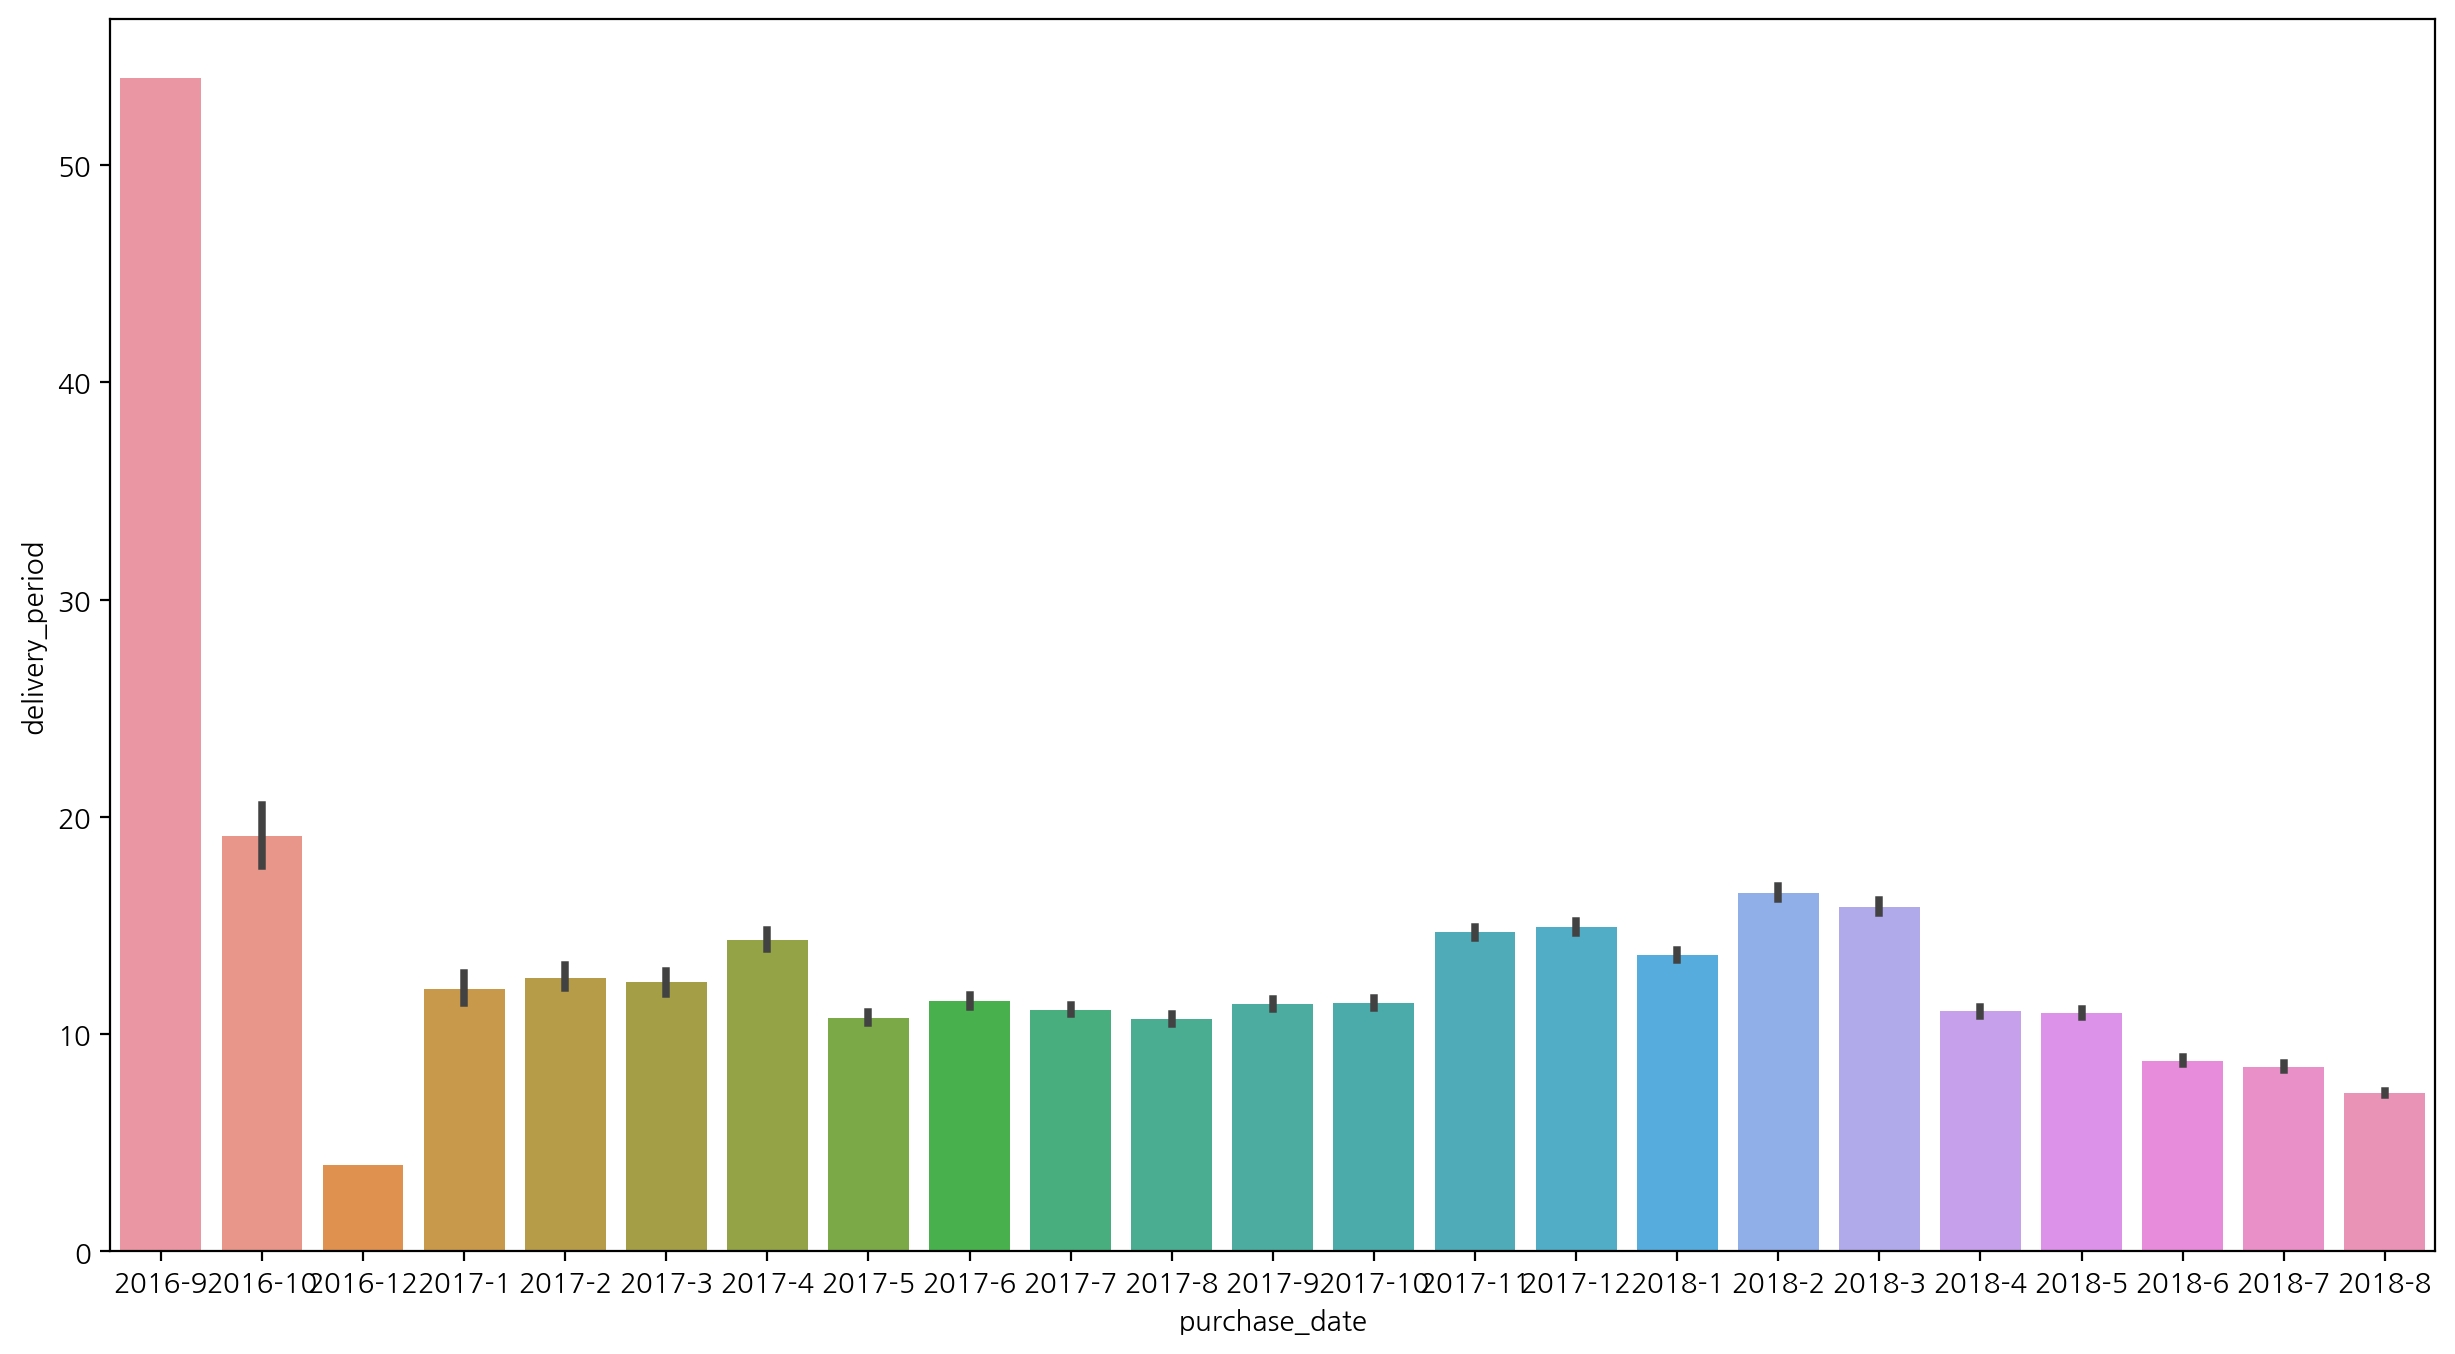

In [27]:
plt.figure(figsize=(15,8))
sns.barplot(orders_df, x="purchase_date", y= "delivery_period")

<AxesSubplot: xlabel='purchase_date', ylabel='estimated_period'>

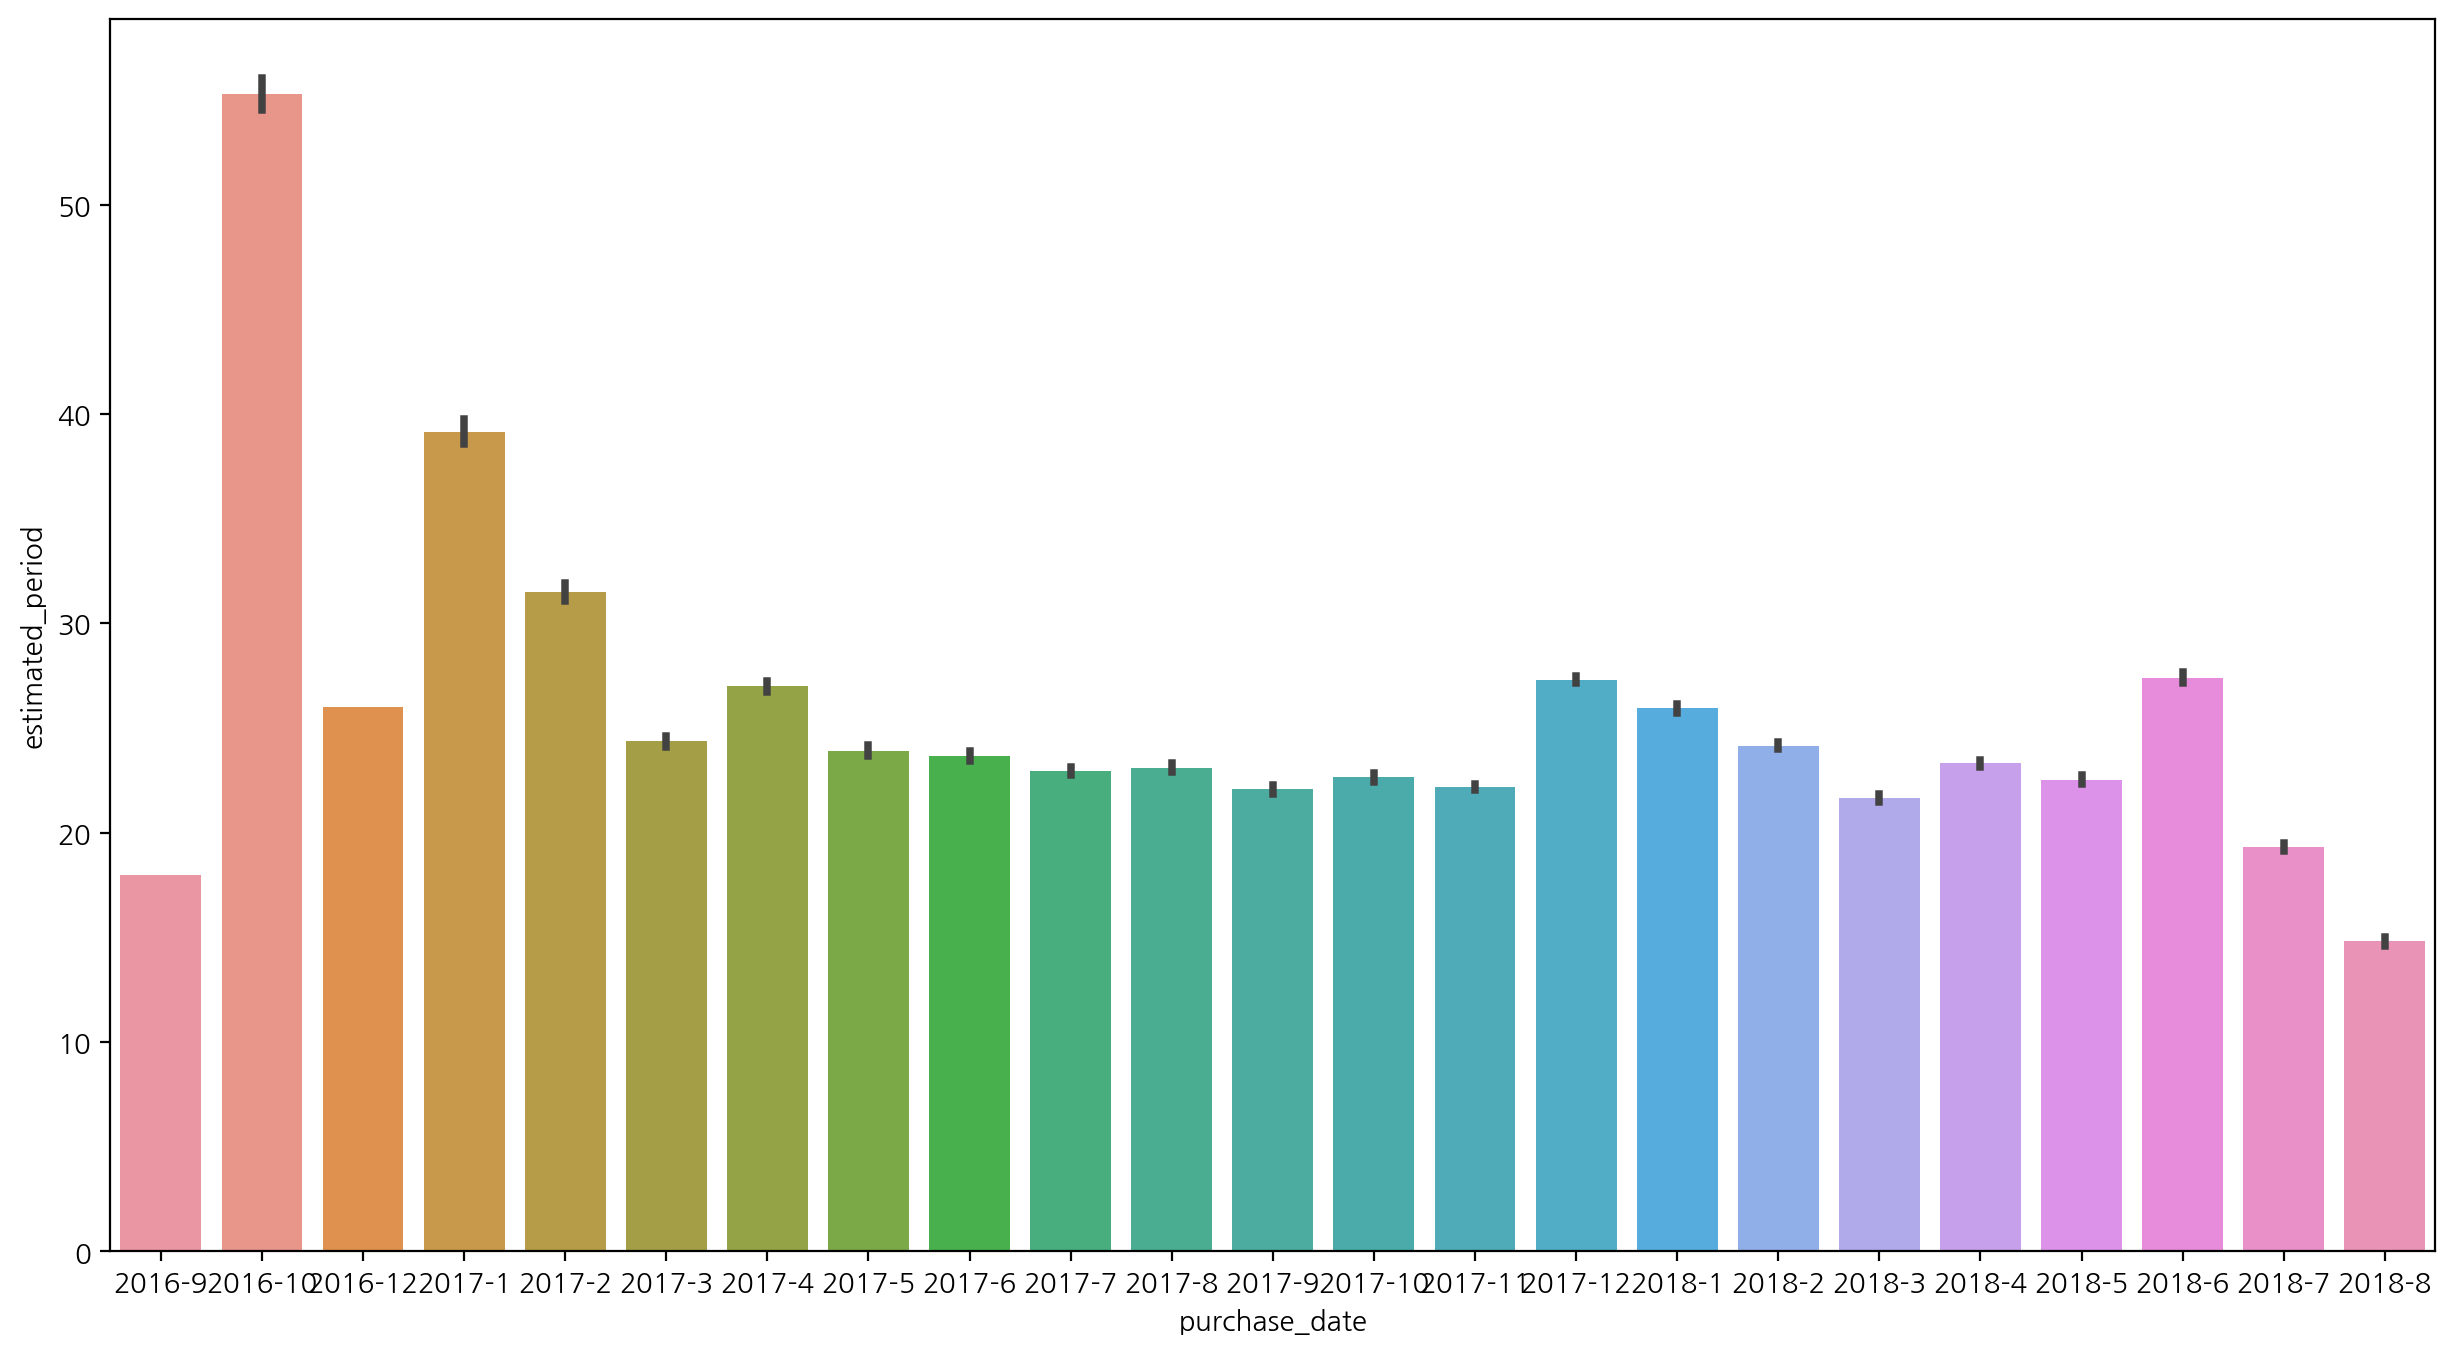

In [28]:
plt.figure(figsize=(15,8))
sns.barplot(orders_df, x="purchase_date", y= "estimated_period")

In [30]:
orders_df["오차기간"] = orders_df["estimated_period"]-orders_df["delivery_period"]

In [32]:
orders_df.sort_values(by= '오차기간')

,order_id,order_estimated_delivery_date,order_purchase_date,delivery_period,estimated_period,purchase_date,오차기간
55619,1b3190b2dfa9d789e1f14c05b647a14a,2018-03-15 00:00:00,2018-02-23 14:57:35,208,19,2018-2,-189
19590,ca07593549f1816d26a572e06dc1eab6,2017-03-22 00:00:00,2017-02-21 23:31:27,209,28,2017-2,-181
11399,47b40429ed8cce3aee9199792275433f,2018-01-19 00:00:00,2018-01-03 09:44:01,191,15,2018-1,-176
81401,2fe324febf907e3ea3f2aa9650869fa5,2017-04-05 00:00:00,2017-03-13 20:17:10,189,22,2017-3,-167
89130,285ab9426d6982034523a855f55a885e,2017-04-06 00:00:00,2017-03-08 22:47:40,194,28,2017-3,-166
...,...,...,...,...,...,...,...
67488,40dc2ba6f322a17626aac6244332828c,2018-01-30 00:00:00,2017-10-05 21:39:05,7,116,2017-10,109
86444,c2bb89b5c1dd978d507284be78a04cb2,2017-10-11 00:00:00,2017-05-23 22:28:36,16,140,2017-5,124
57160,eec7f369423b033e549c02f3c5381205,2018-07-12 00:00:00,2018-02-06 20:44:56,20,155,2018-2,135
15791,c72727d29cde4cf870d569bf65edabfd,2017-07-04 00:00:00,2017-02-07 18:01:15,6,146,2017-2,140


In [35]:
review = review[["order_id","review_score"]]

In [38]:
or_df = pd.merge(orders_df, review, on = "order_id", how = "left")

In [43]:
or_df = or_df.dropna().sort_values(by = "오차기간")

In [53]:
or_df.sort_values(by = 'review_score')

,order_id,order_estimated_delivery_date,order_purchase_date,delivery_period,estimated_period,purchase_date,오차기간,review_score
19969,b0f57536fcde0c4422cea71a465326a5,2017-09-05 00:00:00,2017-08-14 09:32:27,15,21,2017-8,6,1.0
74557,b7dccfff8a209f34ea09e32b844a0c4e,2018-05-24 00:00:00,2018-05-11 16:10:14,4,12,2018-5,8,1.0
28743,5834f9328e03de05af52d90c525b9606,2017-11-08 00:00:00,2017-10-15 20:22:19,9,23,2017-10,14,1.0
94492,06a02b60d897c8f12fb3287e9de120e3,2018-08-28 00:00:00,2018-08-14 18:33:39,5,13,2018-8,8,1.0
58502,8a8d2bb96afe472415715631b0751551,2018-03-22 00:00:00,2018-03-03 22:26:42,10,18,2018-3,8,1.0
...,...,...,...,...,...,...,...,...
33245,8151a29068abf0cf775f916b52473877,2017-12-05 00:00:00,2017-11-14 17:46:59,9,20,2017-11,11,5.0
72925,4a27c106139f0804241485daa3def0e3,2018-05-30 00:00:00,2018-05-06 07:58:38,12,23,2018-5,11,5.0
72931,922dcd32a34436569d5b2ce409862511,2018-05-21 00:00:00,2018-05-06 09:34:25,3,14,2018-5,11,5.0
72304,157527bd197cc424626aa0f831302229,2018-06-04 00:00:00,2018-05-03 15:54:30,20,31,2018-5,11,5.0
